<a href="https://colab.research.google.com/github/tirtha4542/Next/blob/main/classfication_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')
import seaborn as sns



In [ ]:
df = pd.read_csv('/content/electrical_grid.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [ ]:
df.isnull().sum()

,0
tau1,0
tau2,0
tau3,0
tau4,0
p1,0
p2,0
p3,0
p4,0
g1,0
g2,0


In [ ]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


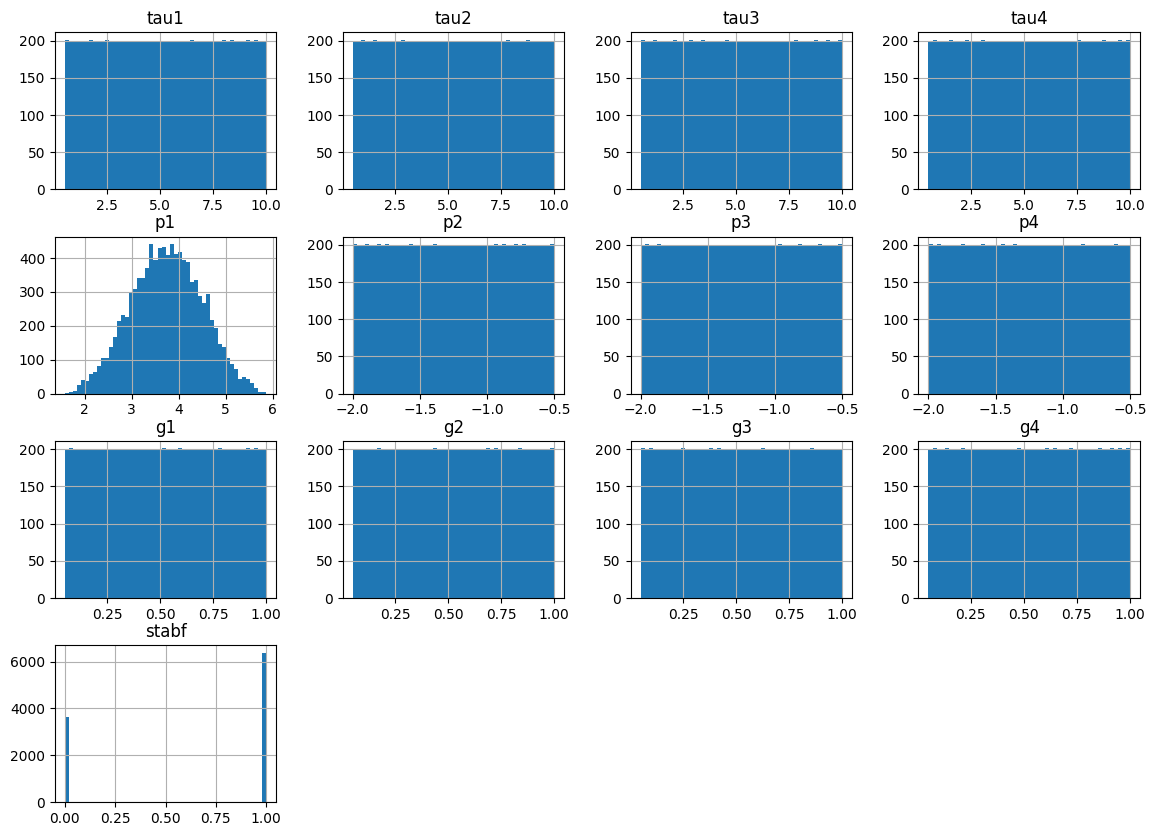

In [ ]:
df.hist(bins=50,figsize=(14,10))
plt.show()

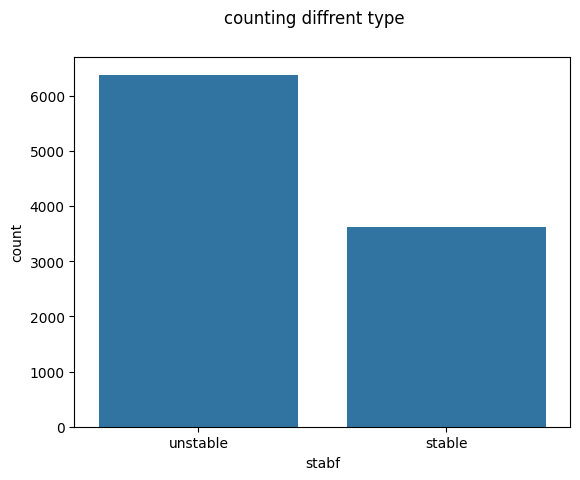

In [ ]:
sns.countplot(data=df,x='stabf')
plt.suptitle("counting diffrent type")
plt.show()

In [ ]:
df['stabf']=df['stabf'].apply(lambda x: 1 if x=='unstable' else 0)

In [ ]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


In [ ]:
corr = df.corr()
corr

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.234898
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.246280
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.237492
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.239375
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.009938
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006173
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.000649
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.022785
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.197664
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.217341


In [ ]:
sorterd_corr= corr['stabf'].sort_values(ascending=False)
sorterd_corr

,stabf
stabf,1.000000
tau2,0.246280
tau4,0.239375
tau3,0.237492
tau1,0.234898
g3,0.231774
g2,0.217341
g4,0.204931
g1,0.197664
p1,0.009938


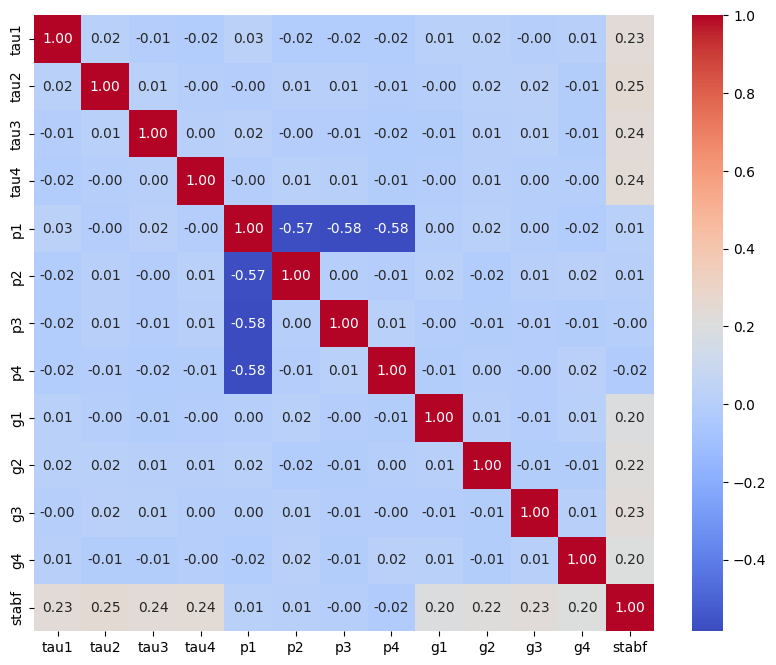

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [ ]:
top_corr = sorterd_corr[1:6]
top_corr

,stabf
tau2,0.246280
tau4,0.239375
tau3,0.237492
tau1,0.234898
g3,0.231774


<Axes: ylabel='None'>

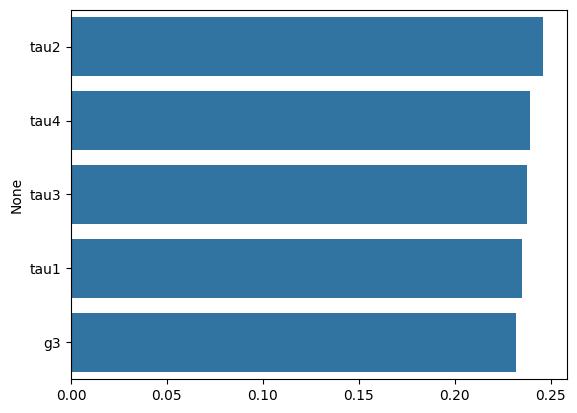

In [ ]:
sns.barplot(x=top_corr.values,y=top_corr.index)

In [ ]:
x = df.drop('stabf',axis=1)

In [ ]:
y=df['stabf']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=41)

In [ ]:
x_train.shape

(7000, 12)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mx = MinMaxScaler()

In [ ]:
x_train_scaled=mx.fit_transform(x_train)

In [ ]:
xtest_scaled = mx.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=101)



In [ ]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=101)

In [ ]:
knn.score(xtest_scaled,y_test)

0.8346666666666667

In [ ]:
pradicted = knn.predict(xtest_scaled)
pradicted

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,RocCurveDisplay,f1_score,confusion_matrix,recall_score

In [ ]:
accuracy_score(y_test,pradicted)

0.8346666666666667

In [ ]:
print(classification_report(y_test,pradicted))

              precision    recall  f1-score   support

           0       0.97      0.55      0.70      1063
           1       0.80      0.99      0.89      1937

    accuracy                           0.83      3000
   macro avg       0.89      0.77      0.79      3000
weighted avg       0.86      0.83      0.82      3000



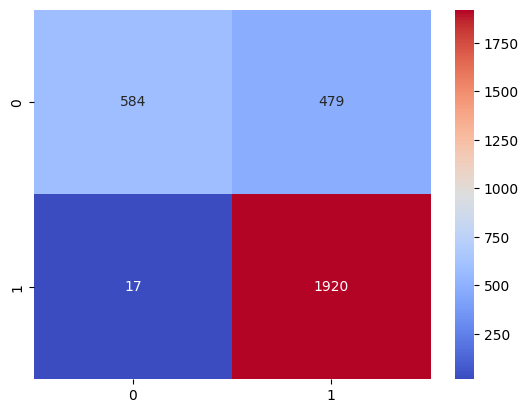

In [ ]:
con=confusion_matrix(y_test,pradicted)
sns.heatmap(data=con,annot=True,cmap='coolwarm',fmt='d')
plt.show()

In [ ]:
f1_score(y_test,pradicted)

0.8856088560885609

In [ ]:
precision_score(y_test,pradicted)

0.8003334722801168

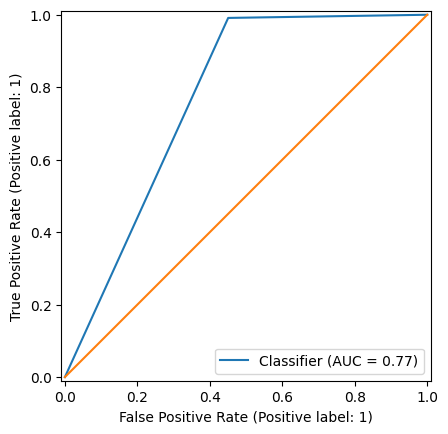

In [ ]:
RocCurveDisplay.from_predictions(y_test,pradicted)
plt.plot([0,1],[0,1])
plt.show()

In [ ]:
from sklearn.model_selection import KFold,cross_val_score


kf = KFold(n_splits=5,shuffle=True,random_state=41)


In [ ]:
kfscore=cross_val_score(knn,x_train_scaled,y_train,cv=kf,scoring='accuracy')

In [ ]:
kfscore

array([0.83928571, 0.81071429, 0.82642857, 0.825     , 0.82      ])